In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import math,copy 
#from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
#plt.style.use('./deeplearning.mplstyle')

In [2]:
#matrix of size and price\

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])
w =209
b =2.4


In [3]:
#def of computing cost by eaching example from 1 to m
#args :
""" 
    x(ndarray (m,)): data , m examples
    y (ndarray(m,)): target values 
    w,b (scaler): models parameters
    
    returns 
       total_cost(float): to fit thedata points in x and y

"""
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum =0
    for i in range (m):
        f_wb = w* x[i]+b 
        cost= (f_wb - y[i])** 2
        cost_sum +=cost 
    total_cost =( 1/ (2*m)) * cost_sum
    
    return total_cost
    

In [4]:
def compute_gradient(x , y , w, b):
   m = x.shape[0]
   dj_dw =0
   dj_db = 0
   
   for i in range (m):
       f_wb = w * x [i]+b
       dj_dw_i = (f_wb - y[i]) * x[i]
       dj_db_i = (f_wb - y[i])
       dj_db += dj_db_i
       dj_dw += dj_dw_i
   dj_dw = dj_dw / m
   dj_db = dj_db / m
   
   return dj_dw , dj_db 

In [23]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing
   
   

In [24]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00


In [6]:
test = compute_cost(x_train, y_train , w , b)
print(test)


1736.2683333333327


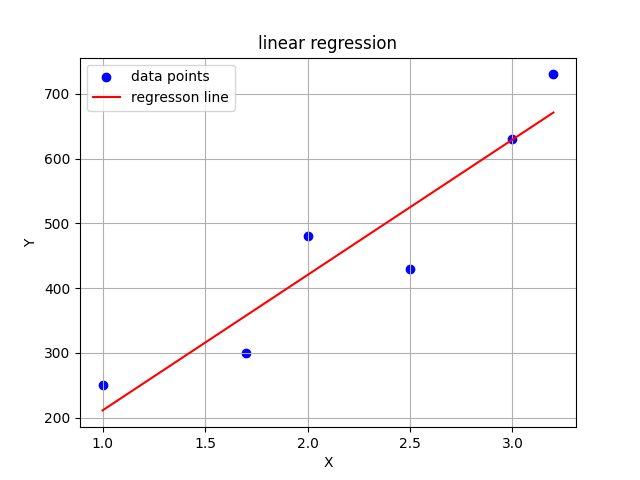

In [7]:
#visual
plt.scatter(x_train, y_train, color = 'blue', label = 'data points')
plt.plot(x_train, w * x_train + b ,color ='red', label= 'regresson line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('linear regression')
plt.legend()
plt.grid(True)
plt.show()